In [ ]:
import graphviz as gv

class Nodo:
    def __init__(self,chave):
        self.chave = chave
        self.esquerda = None
        self.direita = None
        self.altura = 0
        
class AVL:
    def __init__(self):
        self.raiz = None

    def altura(self, no):
        if(no == None):
            return -1
        else:
            return no.altura

    def fator_balanceamento(self, no):
        return abs(self.altura(no.esquerda) - self.altura(no.direita))    

    def rotacao_esq_esq(self, x):
        y = x.esquerda
        x.esquerda = y.direita
        y.direita = x
        x.altura = max(self.altura(x.esquerda),self.altura(x.direita)) + 1
        y.altura = max(self.altura(y.esquerda),x.altura) + 1
        return y

    def rotacao_dir_dir(self, x):
        y = x.direita
        x.direita = y.esquerda
        y.esquerda = x
        x.altura = max(self.altura(x.esquerda),self.altura(x.direita)) + 1
        y.altura = max(self.altura(y.direita),x.altura) + 1
        return y

    def rotacao_esq_dir(self, x):
        x.esquerda = self.rotacao_dir_dir(x.esquerda)
        x = self.rotacao_esq_esq(x)
        return x
        
    def rotacao_dir_esq(self, x):
        x.direita = self.rotacao_esq_esq(x.direita)
        x = self.rotacao_dir_dir(x)
        return x

    def insere_nodo(self,atual,valor):
        if(atual == None): # Árvore vazia ou nó folha
            novo = Nodo(valor)
            return novo
        else:
            if(valor < atual.chave):
                atual.esquerda = self.insere_nodo(atual.esquerda, valor)
                if(self.fator_balanceamento(atual) >= 2):
                    if(valor < atual.esquerda.chave):
                        atual = self.rotacao_esq_esq(atual)
                    else:
                        atual = self.rotacao_esq_dir(atual)
            else:
                atual.direita = self.insere_nodo(atual.direita, valor)
                if(self.fator_balanceamento(atual) >= 2):
                    if(valor > atual.direita.chave):
                        atual = self.rotacao_dir_dir(atual)
                    else:
                        atual = self.rotacao_dir_esq(atual)

            atual.altura = max(self.altura(atual.esquerda),self.altura(atual.direita)) + 1
            return atual                

    def inserir(self, valor):
        if(self.busca(valor)):
            return False #valor já existe na árvore
        else:
            self.raiz = self.insere_nodo(self.raiz, valor)
            return True

    def busca(self, valor):
        if(self.raiz == None):
            return False

        atual = self.raiz
        while(atual != None):
            if(valor == atual.chave):
                return True
            
            if(valor > atual.chave):
                atual = atual.direita
            else:
                atual = atual.esquerda
        
        return False

    def busca_menor(self, atual):
        x = atual
        y = atual.esquerda
        while(y != None):
            x = y
            y = y.esquerda

        return x

    def remove_nodo(self, atual, valor):
        if(atual.chave == valor): #achou o nó a ser removido
            if(atual.esquerda == None or atual.direita == None): # nÃ³ tem 1 filho ou nenhum
                if(atual.esquerda != None):
                    atual = atual.esquerda
                else:
                    atual = atual.direita
                
            else: # nó tem 2 filhos
                temp = self.busca_menor(atual.direita)
                atual.chave = temp.chave
                atual.direita = self.remove_nodo(atual.direita, atual.chave)
                if(self.fator_balanceamento(atual) >= 2):
                    if(self.altura(atual.esquerda.direita) <= self.altura(atual.esquerda.esquerda)):
                        atual = self.rotacao_esq_esq(atual)
                    else:
                        atual = self.rotacao_esq_dir(atual)
                        
            if(atual != None):
                atual.altura = max(self.altura(atual.esquerda),self.altura(atual.direita)) + 1

        else:# procura o nó a ser removido
            if(valor < atual.chave):
                atual.esquerda = self.remove_nodo(atual.esquerda, valor)
                if(self.fator_balanceamento(atual) >= 2):
                    if(self.altura(atual.direita.esquerda) <= self.altura(atual.direita.direita)):
                        atual = self.rotacao_dir_dir(atual)
                    else:
                        atual = self.rotacao_dir_esq(atual)                        
            else:
                atual.direita = self.remove_nodo(atual.direita, valor)
                if(self.fator_balanceamento(atual) >= 2):
                    if(self.altura(atual.esquerda.direita) <= self.altura(atual.esquerda.esquerda)):
                        atual = self.rotacao_esq_esq(atual)
                    else:
                        atual = self.rotacao_esq_dir(atual)

            atual.altura = max(self.altura(atual.esquerda),self.altura(atual.direita)) + 1

        return atual    
    
    def remove(self, valor):        
        if(self.raiz == None or not self.busca(valor)):
            return False #Árvore vazia ou valor do nó existe na árvore
        else:
            self.raiz = self.remove_nodo(self.raiz, valor)
            return True    


    def gerar_arcos(self):
      arcos = []
      pilha = [self.raiz]
      while pilha:
        x = pilha.pop()
        if x.esquerda:
          arcos.append((x.chave, x.esquerda.chave))
          pilha.append(x.esquerda)
        if x.direita:
          arcos.append((x.chave, x.direita.chave))
          pilha.append(x.direita)
      return arcos

    def gerar_grafo(self):
      arcos = self.gerar_arcos()
      g = gv.Digraph('G', filename='tree.gv')
      for arco in arcos:
        g.edge(str(arco[0]), str(arco[1]))
      return g

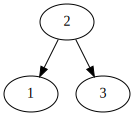

In [ ]:
avl = AVL()
for x in [1,2,3]:
  avl.inserir(x)

avl.gerar_grafo()

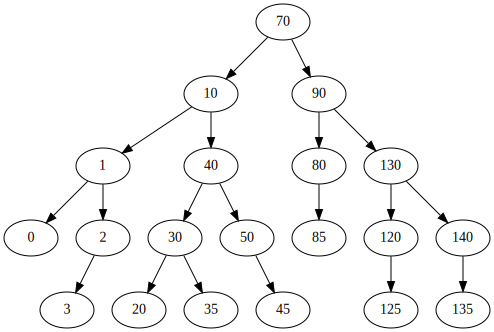

In [ ]:
avl_teste = AVL()
for x in [50,20,30,80,70,120,90,85,35,40,45,10,0,1,2,3,140,130,135,125]:
  avl_teste.inserir(x)
avl_teste.gerar_grafo()